In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/MY_Final_Dataset_csv.csv')

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
print(data.describe())

       Flow Duration  Tot Fwd Pkts  ...      Idle Min         Label
count   1.300200e+04  13002.000000  ...  1.300200e+04  13002.000000
mean    4.677099e+06      4.311567  ...  1.620660e+06      0.423166
std     2.001412e+07     48.197293  ...  8.517956e+06      0.494080
min     1.000000e+00      0.000000  ...  0.000000e+00      0.000000
25%     2.000000e+01      0.000000  ...  0.000000e+00      0.000000
50%     2.486500e+03      1.000000  ...  0.000000e+00      0.000000
75%     5.636250e+03      2.000000  ...  0.000000e+00      1.000000
max     1.199871e+08   3767.000000  ...  1.180000e+08      1.000000

[8 rows x 67 columns]


In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
X= data.drop('Label', axis=1)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
#Transform the data
df = pca.fit_transform(data)
df.shape

(13002, 2)

In [ ]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 0 0 ... 0 0 0]


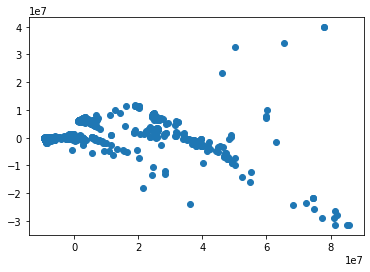

In [ ]:
#plotting the individual cluster(Normal network flow)
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

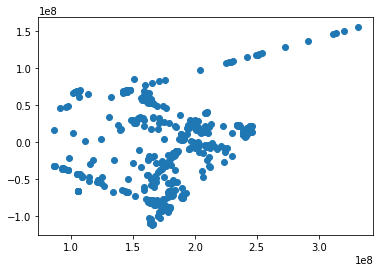

In [ ]:
#plotting the individual cluster(DDoS attack)
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label1 = df[label == 1]
 
#plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.show()

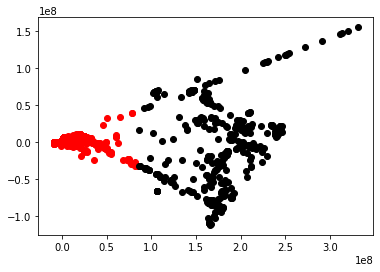

In [ ]:
#filter rows of original data
filtered_label0 = df[label == 0]
 
filtered_label1 = df[label == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

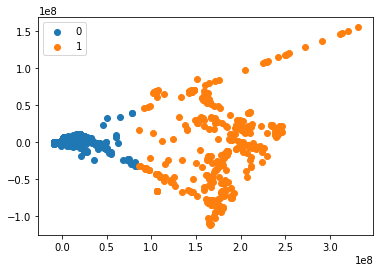

In [ ]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

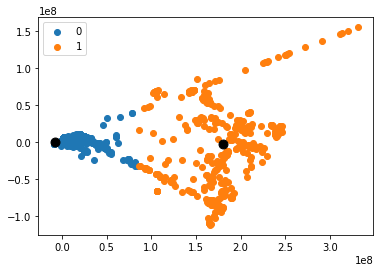

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(data.Label, label)

0.5336871250576835